source: https://www.youtube.com/watch?v=Lsue2gEM9D0&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=34

In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt


In [2]:
genes = ['gene' + str(i) for i in range (1, 101)]
wt = ['wt' + str(i) for i in range (1,6)]
ko = ['ko' + str(i) for i in range (1,6)]


In [10]:
data = pd.DataFrame(columns=[*wt, *ko], index = genes)
data

# columns -> sample, rows -> measurements/parameters

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
gene96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam = rd.randrange(10, 1000), size = 5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam = rd.randrange(10, 1000), size = 5)

In [12]:
data

# columns -> sample, rows -> measurements/parameters

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,808,783,821,790,789,736,739,711,732,679
gene2,916,975,918,938,950,515,538,511,554,521
gene3,101,108,88,101,106,204,200,173,199,209
gene4,391,387,368,348,378,174,182,201,166,170
gene5,262,260,263,252,265,604,597,659,595,630
...,...,...,...,...,...,...,...,...,...,...
gene96,838,812,783,822,839,778,735,745,766,736
gene97,482,564,556,537,508,500,488,448,518,489
gene98,62,62,68,72,56,110,120,114,117,121
gene99,918,936,837,878,939,22,15,15,17,15


In [13]:
data.shape

(100, 10)

After centering, the average value for each gene will be 0, and after scaling, the standard deviation for the values for each gene will be 1

mean = 0, st.dev = 1

Another approach is StandardScaler().fit_transform(data.T)

In [14]:
# scale function expects the samples to be rows instead of columns and for this reason we transpose the matrix

scaled_data = preprocessing.scale(data.T)
scaled_data

array([[ 1.12743257,  0.88248221, -0.97449353,  1.15782742, -0.98624922,
         0.94096602, -0.97950818, -0.93472801,  0.95095169, -0.81356633,
         1.14421606,  0.95547918, -0.69628076, -0.74885439, -1.06542693,
        -1.02046238, -0.92527182, -1.79160262, -0.70031076, -1.1385154 ,
        -1.01933603, -1.13676834,  1.00431998, -1.06210728,  0.92741624,
         1.16701117, -0.99568678, -1.17135527, -0.89859798, -0.8647282 ,
         0.9683032 , -0.69264459,  0.81721368,  0.95176183,  0.95766788,
         1.03890097,  0.73678073, -0.92171774,  0.85600881,  0.80533174,
         1.03878184, -1.42821294,  1.13555276,  1.0801987 ,  0.94764051,
         0.90665337, -1.19414912, -0.82060423, -0.57625194,  0.89025545,
         0.47145895,  0.46457221,  0.85642923,  0.99787763, -0.91526376,
         1.451938  ,  0.32276795,  0.95643635,  0.73440692, -0.95101762,
        -1.01891303, -1.08518536,  1.06568659,  0.16870448,  0.93318109,
        -1.1986584 , -1.32404304, -1.02743586, -1.0

In [15]:
pca = PCA()

In [16]:
pca.fit(scaled_data)

PCA()

In [18]:
# this is where we generate coordinates for a PCA graph based on the loading scores and the scaled data
pca_data = pca.transform(scaled_data) 
pca_data

array([[-9.52020492e+00, -1.09178377e+00,  1.86759436e+00,
        -1.74551068e+00, -1.35150404e+00,  1.14126453e+00,
         1.31891868e+00,  1.65417700e-01, -4.79455390e-02,
         4.57880543e-15],
       [-9.29237128e+00,  1.92546106e+00, -1.22743588e+00,
         2.03231906e+00,  8.16861157e-02, -8.32555958e-01,
         1.55213700e+00,  1.61288838e-01,  2.02495305e-01,
        -5.05409575e-16],
       [-9.64047967e+00, -1.59810235e+00, -1.76745852e+00,
         9.05435097e-01,  1.20937968e+00,  1.98472706e+00,
        -6.89949636e-01, -6.31780105e-01, -4.89995860e-02,
         8.14232279e-16],
       [-9.07501228e+00, -1.13646425e+00, -7.37349786e-01,
        -7.74484540e-02, -1.74879830e+00, -1.41545503e+00,
        -1.36433229e+00,  1.01615992e+00,  3.00263284e-01,
         2.81658369e-16],
       [-9.46863575e+00,  1.83836510e+00,  1.82775903e+00,
        -1.11314023e+00,  1.78254644e+00, -9.80631242e-01,
        -8.08155286e-01, -7.06423312e-01, -4.06864985e-01,
         7.

In [19]:
# Here, we are calculating the percentage of variation that each principal component accounts for
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
per_var

array([88.4,  2.6,  2.3,  1.8,  1.7,  1.2,  0.8,  0.8,  0.4,  0. ])

In [22]:
# Now we are creating labels for a scree plot
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
labels

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

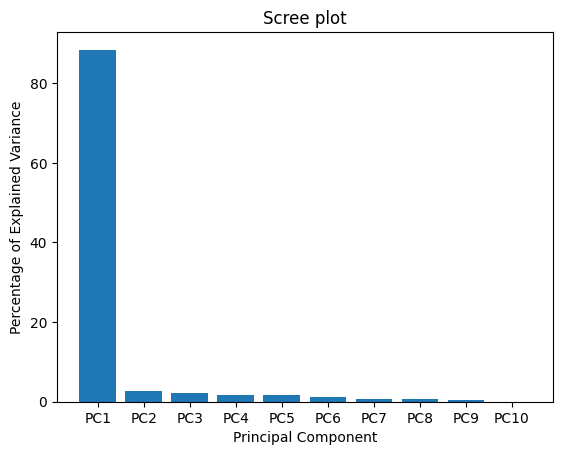

In [23]:
plt.bar(x= range(1, len(per_var)+1), height = per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree plot')
plt.show()

In [24]:
pca_df = pd.DataFrame(pca_data, index = [*wt, *ko], columns = labels)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wt1,-9.520205,-1.091784,1.867594,-1.745511,-1.351504,1.141265,1.318919,0.165418,-0.047946,4.578805e-15
wt2,-9.292371,1.925461,-1.227436,2.032319,0.081686,-0.832556,1.552137,0.161289,0.202495,-5.054096e-16
wt3,-9.640480,-1.598102,-1.767459,0.905435,1.209380,1.984727,-0.689950,-0.631780,-0.049000,8.142323e-16
wt4,-9.075012,-1.136464,-0.737350,-0.077448,-1.748798,-1.415455,-1.364332,1.016160,0.300263,2.816584e-16
wt5,-9.468636,1.838365,1.827759,-1.113140,1.782546,-0.980631,-0.808155,-0.706423,-0.406865,7.252378e-16
ko1,9.078802,3.271113,-0.761932,-0.547182,-1.337864,1.477532,-0.640903,0.298177,-0.135104,-8.385092e-16
ko2,9.380470,-0.927084,0.918698,0.777916,1.527096,0.130988,0.152314,1.823738,-0.697759,-1.877376e-16
ko3,9.370376,-0.662866,2.458245,2.200797,-0.827896,-0.019564,-0.342268,-1.002881,0.540528,1.142299e-15
ko4,9.467317,-0.410353,-0.954707,-1.734000,1.356841,-0.382962,0.361243,0.008463,1.349121,-2.554898e-15
ko5,9.699739,-1.208285,-1.623413,-0.699186,-0.691487,-1.103344,0.460995,-1.132160,-1.055735,3.155738e-16


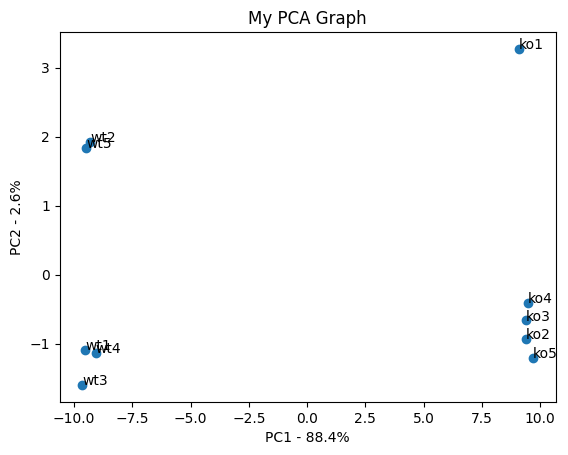

In [28]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, 
                 (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample])
                )
    
plt.show()

Let's look at the loading score for PC1 to determine which genes had the largest influence on separating the two clusters along the x-axis

In [30]:
loading_scores = pd.Series(pca.components_[0], index = genes)
loading_scores

gene1     -0.096715
gene2     -0.105805
gene3      0.104194
gene4     -0.105398
gene5      0.105842
             ...   
gene96    -0.092715
gene97    -0.063829
gene98     0.104823
gene99    -0.106124
gene100   -0.103410
Length: 100, dtype: float64

In [32]:
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
sorted_loading_scores

gene90    0.106320
gene23    0.106312
gene35    0.106281
gene78    0.106280
gene44    0.106278
            ...   
gene57    0.055658
gene64    0.044906
gene72    0.036634
gene73    0.022813
gene79    0.016366
Length: 100, dtype: float64

In [37]:
sorted_loading_scores.head(10)

gene90    0.106320
gene23    0.106312
gene35    0.106281
gene78    0.106280
gene44    0.106278
gene54    0.106274
gene68    0.106242
gene88    0.106239
gene76    0.106234
gene45    0.106225
dtype: float64

In [36]:
sorted_loading_scores.head(10).index.values

array(['gene90', 'gene23', 'gene35', 'gene78', 'gene44', 'gene54',
       'gene68', 'gene88', 'gene76', 'gene45'], dtype=object)

# Another one

source: https://www.youtube.com/watch?v=cbslrjMXBVg

In [38]:
from sklearn.decomposition import PCA

In [40]:
df = pd.DataFrame(np.arange(200).reshape(-1, 10),
            columns = list('ABCDEFGHIJ'))
df

,A,B,C,D,E,F,G,H,I,J
0,0,1,2,3,4,5,6,7,8,9
1,10,11,12,13,14,15,16,17,18,19
2,20,21,22,23,24,25,26,27,28,29
3,30,31,32,33,34,35,36,37,38,39
4,40,41,42,43,44,45,46,47,48,49
5,50,51,52,53,54,55,56,57,58,59
6,60,61,62,63,64,65,66,67,68,69
7,70,71,72,73,74,75,76,77,78,79
8,80,81,82,83,84,85,86,87,88,89
9,90,91,92,93,94,95,96,97,98,99


In [41]:
df1 = df.iloc[:10]
df1

,A,B,C,D,E,F,G,H,I,J
0,0,1,2,3,4,5,6,7,8,9
1,10,11,12,13,14,15,16,17,18,19
2,20,21,22,23,24,25,26,27,28,29
3,30,31,32,33,34,35,36,37,38,39
4,40,41,42,43,44,45,46,47,48,49
5,50,51,52,53,54,55,56,57,58,59
6,60,61,62,63,64,65,66,67,68,69
7,70,71,72,73,74,75,76,77,78,79
8,80,81,82,83,84,85,86,87,88,89
9,90,91,92,93,94,95,96,97,98,99


In [42]:
df2 = df.iloc[10:]
df2

,A,B,C,D,E,F,G,H,I,J
10,100,101,102,103,104,105,106,107,108,109
11,110,111,112,113,114,115,116,117,118,119
12,120,121,122,123,124,125,126,127,128,129
13,130,131,132,133,134,135,136,137,138,139
14,140,141,142,143,144,145,146,147,148,149
15,150,151,152,153,154,155,156,157,158,159
16,160,161,162,163,164,165,166,167,168,169
17,170,171,172,173,174,175,176,177,178,179
18,180,181,182,183,184,185,186,187,188,189
19,190,191,192,193,194,195,196,197,198,199


In [43]:
pca = PCA()
pca.fit(df1)

PCA()

In [44]:
dir(pca)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_fit',
 '_fit_full',
 '_fit_svd_solver',
 '_fit_truncated',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_n_features_out',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'components_',
 'copy',
 'explained_variance_',
 'explained_variance_ratio_',
 'feature_names_in_',
 'fit',
 'fit_transform',
 'get_covariance',
 'get_feature_names_out',
 'get_params',
 'get_precision',
 'inverse_transform',
 'iterated_power',
 'mean_',
 'n_components',
 'n_components_',
 'n_featur

In [46]:
pd.DataFrame(pca.components_)

,0,1,2,3,4,5,6,7,8,9
0,-0.316228,-0.316228,-0.316228,-0.316228,-0.316228,-0.316228,-0.316228,-0.316228,-0.316228,-0.316228
1,0.948683,-0.105409,-0.105409,-0.105409,-0.105409,-0.105409,-0.105409,-0.105409,-0.105409,-0.105409
2,0.000000,-0.333333,-0.083333,-0.083333,0.916667,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333
3,0.000000,-0.333333,-0.083333,-0.083333,-0.083333,0.916667,-0.083333,-0.083333,-0.083333,-0.083333
4,0.000000,-0.333333,-0.083333,-0.083333,-0.083333,-0.083333,0.916667,-0.083333,-0.083333,-0.083333
5,0.000000,-0.333333,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,0.916667,-0.083333,-0.083333
6,0.000000,-0.333333,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,0.916667,-0.083333
7,0.000000,-0.333333,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,0.916667
8,0.000000,-0.333333,-0.083333,0.916667,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333
9,0.000000,-0.333333,0.916667,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333


In [47]:
pca = PCA(n_components=2)
pca.fit(df1)
pd.DataFrame(pca.components_)

,0,1,2,3,4,5,6,7,8,9
0,-0.316228,-0.316228,-0.316228,-0.316228,-0.316228,-0.316228,-0.316228,-0.316228,-0.316228,-0.316228
1,0.948683,-0.105409,-0.105409,-0.105409,-0.105409,-0.105409,-0.105409,-0.105409,-0.105409,-0.105409


In [48]:
pca = PCA(n_components=3)
pca.fit(df1)             # components (key for interpreting the new data)
key_df = pd.DataFrame(pca.components_)
key_df

,0,1,2,3,4,5,6,7,8,9
0,-0.316228,-0.316228,-0.316228,-0.316228,-0.316228,-0.316228,-0.316228,-0.316228,-0.316228,-0.316228
1,0.948683,-0.105409,-0.105409,-0.105409,-0.105409,-0.105409,-0.105409,-0.105409,-0.105409,-0.105409
2,0.000000,-0.333333,-0.083333,-0.083333,0.916667,-0.083333,-0.083333,-0.083333,-0.083333,-0.083333


In [49]:
arr = pca.transform(df1)  # gives us the reduced data
data1_df = pd.DataFrame(arr, columns = ['pca1', 'pca2', 'pca3'])
data1_df

,pca1,pca2,pca3
0,142.302495,-5.218048e-15,-2.081668e-16
1,110.679718,-1.521006e-14,-9.020562e-16
2,79.056942,-7.882583e-15,1.804112e-16
3,47.434165,-5.884182e-15,8.187895e-16
4,15.811388,-1.554312e-15,-9.714451e-17
5,-15.811388,1.554312e-15,9.714451e-17
6,-47.434165,5.884182e-15,-8.187895e-16
7,-79.056942,7.882583e-15,-1.804112e-16
8,-110.679718,1.521006e-14,9.020562e-16
9,-142.302495,5.218048e-15,2.081668e-16


In [52]:
pca.explained_variance_ratio_.round(4)

array([1., 0., 0.])

In [54]:
#### anew

df = pd.DataFrame(np.random.normal(size = (20, 10)),
            columns = list('ABCDEFGHIJ'))
df

,A,B,C,D,E,F,G,H,I,J
0,-0.075647,0.638916,1.073603,-0.980463,-1.453577,0.054580,-0.001153,-1.803275,-0.751035,-1.535971
1,-0.622740,0.839116,-0.846660,1.863728,0.133952,-1.305174,0.255181,1.284161,-0.536414,0.147849
2,-1.043344,0.134448,-0.119373,-1.016831,0.445125,-1.319169,1.895257,0.320137,0.384418,1.293825
3,0.935898,0.371926,-1.669007,0.334161,-0.406314,0.883932,0.669979,1.433156,-1.821734,0.727786
4,-0.702843,-0.734762,0.240293,1.404324,0.398625,-0.308347,-0.811652,-1.054704,-1.052836,1.643094
5,0.490914,1.451610,-1.055851,1.039467,-1.346536,-0.526725,0.392896,2.171204,-0.436210,-0.869635
6,0.500272,0.840127,-1.109811,-0.163042,-0.382442,0.580959,-0.112597,0.550939,-3.095456,0.762708
7,-0.449362,-2.693061,-2.433828,0.490516,0.390443,1.190115,1.226726,0.666193,0.436857,-2.038477
8,-1.044465,2.305824,-0.281539,-0.421100,0.668242,-0.454183,0.418075,-2.348843,-0.695326,0.239718
9,-0.032268,0.240817,0.148618,-0.576919,0.327182,0.661204,0.088043,-1.841626,0.764805,0.170542


In [55]:
df1 = df.iloc[:10]
df2 = df.iloc[10:]

In [60]:
# if n_components is equal to integers then we get that amount of pca components
# if we provide any float number between 0 and 1 then we get such amount of pca components which explain that float number % of
# the whole variance
# in a case of n_components=0.9, we want to get all the components that is enough for us to explain at least 90% of variance

pca = PCA(n_components=0.9)  
pca.fit(df1)

PCA(n_components=0.9)

In [61]:
arr = pca.transform(df1)  # gives us the reduced data
data1_df = pd.DataFrame(arr)
data1_df

,0,1,2,3,4
0,2.125333,0.614040,2.189262,-0.877334,-0.567570
1,-1.188299,-0.991067,-1.459288,-0.787477,-1.172820
2,0.678919,0.373088,-2.100486,-0.916375,1.645344
3,-1.982715,-1.116891,0.623635,0.835384,0.945983
4,0.965188,-0.290094,-1.286061,2.008082,-1.415788
5,-2.091661,-1.163713,0.488291,-1.912829,-0.635874
6,-0.740295,-1.966378,1.204113,1.376341,0.749847
7,-2.584227,3.746776,0.255173,0.425311,0.006816
8,2.827962,-0.546610,-0.096434,-0.373632,0.354072
9,1.989795,1.340849,0.181794,0.222530,0.089991


In [62]:
pca.explained_variance_ratio_.round(2)

array([0.34, 0.23, 0.15, 0.12, 0.08])

In [59]:
pca.explained_variance_ratio_.round(2)

array([0.34, 0.23, 0.15, 0.12, 0.08, 0.05, 0.03, 0.  , 0.  , 0.  ])

# Another

source: https://www.youtube.com/watch?v=52d7ha-GdV8

In [64]:
# So, here we are depicting iris data with 4 columns onto 2D area, like sequeezing into 2 totally new columns 

from sklearn.datasets import load_iris

In [80]:
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [82]:
X = data.data
y = data.target

In [83]:
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

In [84]:
print('Shape of X:', X.shape)
print('Shape of transformed X:', X_projected.shape)

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


In [85]:
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

C:\Users\azizt\AppData\Local\Temp\ipykernel_18384\491279724.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', 3))


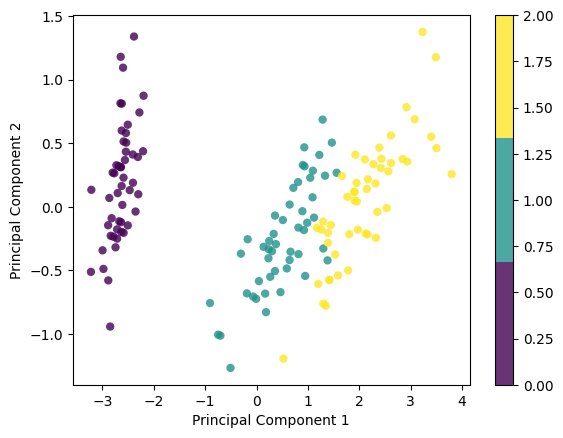

In [86]:
plt.scatter(x1, x2, 
           c= y, edgecolor = 'none', alpha = 0.8,
            cmap = plt.cm.get_cmap('viridis', 3))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

In [87]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# If we look at the y variable, we can also see that there are 3 y outcome. The graph suggests that 2nd type of y is much 
# similar to 3rd type compared to its similarity to 1st type of y